In [44]:
# Read in the document-term matrix
import pandas as pd

df = pd.read_pickle('dtm.pkl')
df = df.transpose()
df.head()

,hasan,russell,trevor
aah,0,1,0
abandoned,0,0,1
able,0,1,0
absentia,1,0,0
absolute,0,1,0


In [45]:
# Find the top 30 words said by each comedian
top_dict = {}

for c in df.columns:
    top = df[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'hasan': [('like', 42),
  ('guys', 26),
  ('know', 23),
  ('just', 23),
  ('trump', 22),
  ('thats', 20),
  ('president', 17),
  ('youre', 16),
  ('im', 16),
  ('right', 14),
  ('donald', 13),
  ('news', 12),
  ('tell', 12),
  ('man', 12),
  ('think', 11),
  ('tonight', 11),
  ('steve', 10),
  ('thank', 10),
  ('time', 10),
  ('stop', 9),
  ('bannon', 9),
  ('house', 9),
  ('going', 9),
  ('dont', 9),
  ('trust', 8),
  ('hes', 8),
  ('white', 8),
  ('want', 8),
  ('lot', 8),
  ('minority', 7)],
 'russell': [('like', 132),
  ('im', 99),
  ('know', 71),
  ('thats', 67),
  ('dont', 64),
  ('just', 56),
  ('oh', 55),
  ('youre', 48),
  ('yeah', 47),
  ('right', 44),
  ('doctor', 44),
  ('people', 41),
  ('good', 38),
  ('shit', 36),
  ('bed', 30),
  ('guy', 29),
  ('indian', 27),
  ('gonna', 26),
  ('going', 26),
  ('look', 25),
  ('black', 24),
  ('dad', 23),
  ('goes', 22),
  ('got', 21),
  ('okay', 21),
  ('did', 21),
  ('india', 21),
  ('years', 21),
  ('want', 20),
  ('gotta', 20)],


In [46]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('-'*100)

hasan
like, guys, know, just, trump, thats, president, youre, im, right, donald, news, tell, man
----------------------------------------------------------------------------------------------------
russell
like, im, know, thats, dont, just, oh, youre, yeah, right, doctor, people, good, shit
----------------------------------------------------------------------------------------------------
trevor
like, know, im, dont, just, said, snake, people, tacos, man, going, yeah, thats, right
----------------------------------------------------------------------------------------------------


In [47]:

# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in df.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'guys',
 'know',
 'just',
 'trump',
 'thats',
 'president',
 'youre',
 'im',
 'right',
 'donald',
 'news',
 'tell',
 'man',
 'think',
 'tonight',
 'steve',
 'thank',
 'time',
 'stop',
 'bannon',
 'house',
 'going',
 'dont',
 'trust',
 'hes',
 'white',
 'want',
 'lot',
 'minority',
 'like',
 'im',
 'know',
 'thats',
 'dont',
 'just',
 'oh',
 'youre',
 'yeah',
 'right',
 'doctor',
 'people',
 'good',
 'shit',
 'bed',
 'guy',
 'indian',
 'gonna',
 'going',
 'look',
 'black',
 'dad',
 'goes',
 'got',
 'okay',
 'did',
 'india',
 'years',
 'want',
 'gotta',
 'like',
 'know',
 'im',
 'dont',
 'just',
 'said',
 'snake',
 'people',
 'tacos',
 'man',
 'going',
 'yeah',
 'thats',
 'right',
 'hes',
 'time',
 'want',
 'got',
 'thing',
 'theres',
 'didnt',
 'trevor',
 'think',
 'oh',
 'wall',
 'food',
 'ive',
 'love',
 'youre',
 'thank']

In [48]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 3),
 ('know', 3),
 ('dont', 3),
 ('youre', 3),
 ('want', 3),
 ('right', 3),
 ('thats', 3),
 ('im', 3),
 ('going', 3),
 ('just', 3),
 ('man', 2),
 ('yeah', 2),
 ('thank', 2),
 ('think', 2),
 ('hes', 2),
 ('people', 2),
 ('got', 2),
 ('oh', 2),
 ('time', 2),
 ('dad', 1),
 ('did', 1),
 ('stop', 1),
 ('trump', 1),
 ('lot', 1),
 ('gonna', 1),
 ('tacos', 1),
 ('black', 1),
 ('guys', 1),
 ('ive', 1),
 ('white', 1),
 ('doctor', 1),
 ('look', 1),
 ('love', 1),
 ('bannon', 1),
 ('trevor', 1),
 ('tell', 1),
 ('good', 1),
 ('shit', 1),
 ('years', 1),
 ('indian', 1),
 ('news', 1),
 ('wall', 1),
 ('trust', 1),
 ('theres', 1),
 ('donald', 1),
 ('bed', 1),
 ('president', 1),
 ('gotta', 1),
 ('guy', 1),
 ('india', 1),
 ('food', 1),
 ('house', 1),
 ('steve', 1),
 ('thing', 1),
 ('didnt', 1),
 ('minority', 1),
 ('tonight', 1),
 ('goes', 1),
 ('okay', 1),
 ('snake', 1),
 ('said', 1)]

In [49]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [50]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [51]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

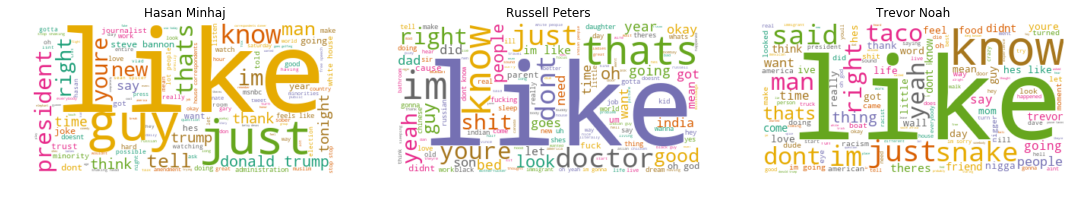

In [52]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [25, 10]

full_names = ['Hasan Minhaj','Russell Peters', 'Trevor Noah']

# Create subplots for each comedian
for index, comedian in enumerate(df.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()



In [53]:

# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in df.columns:
    uniques = df[comedian].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

/home/vibertron/environments/venv/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  import sys


,comedian,unique_words
0,Hasan Minhaj,772
1,Russell Peters,1169
2,Trevor Noah,1240


In [54]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in df.columns:
    totals = sum(df[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [120, 73, 63]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
0,Hasan Minhaj,772,1571,120,13.091667
1,Russell Peters,1169,4187,73,57.356164
2,Trevor Noah,1240,4606,63,73.111111


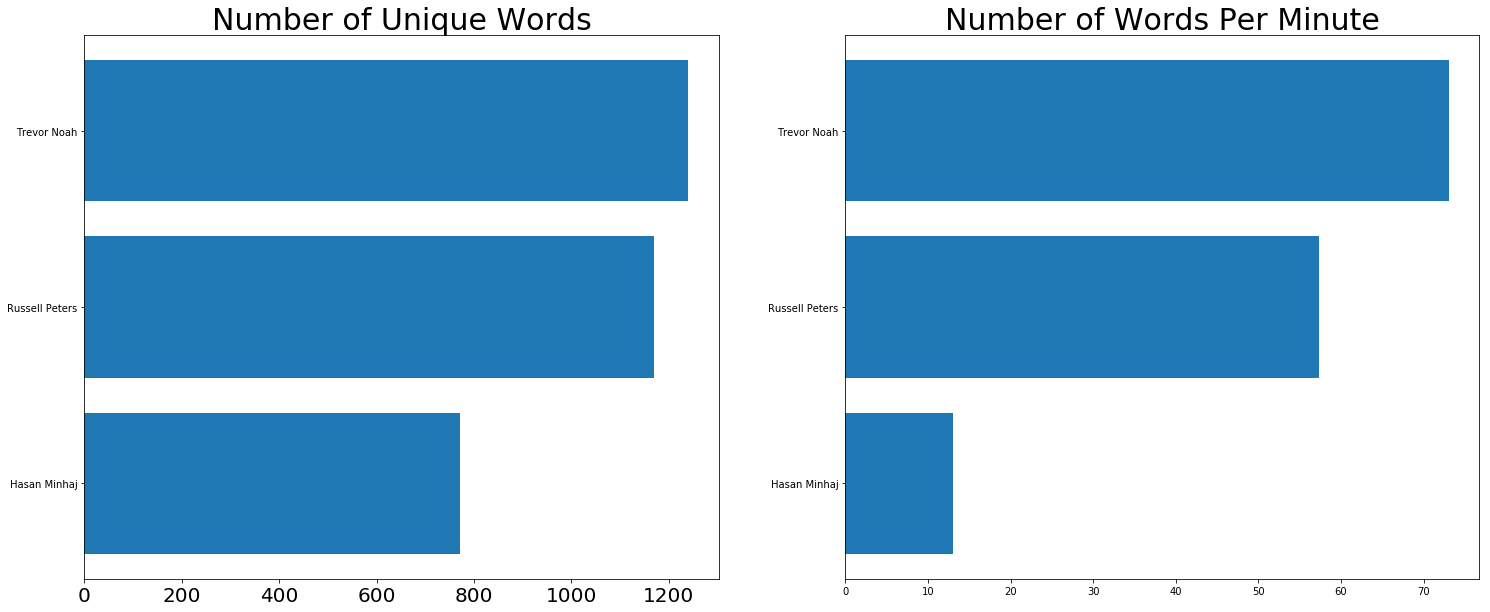

In [55]:


# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.set_cmap("viridis")
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.xticks(fontsize=20)
plt.title('Number of Unique Words', fontsize=30)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=30)

#plt.tight_layout()
plt.show()



In [56]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 3),
 ('know', 3),
 ('dont', 3),
 ('youre', 3),
 ('want', 3),
 ('right', 3),
 ('thats', 3),
 ('im', 3),
 ('going', 3),
 ('just', 3),
 ('man', 2),
 ('yeah', 2),
 ('thank', 2),
 ('think', 2),
 ('hes', 2),
 ('people', 2),
 ('got', 2),
 ('oh', 2),
 ('time', 2),
 ('dad', 1),
 ('did', 1),
 ('stop', 1),
 ('trump', 1),
 ('lot', 1),
 ('gonna', 1),
 ('tacos', 1),
 ('black', 1),
 ('guys', 1),
 ('ive', 1),
 ('white', 1),
 ('doctor', 1),
 ('look', 1),
 ('love', 1),
 ('bannon', 1),
 ('trevor', 1),
 ('tell', 1),
 ('good', 1),
 ('shit', 1),
 ('years', 1),
 ('indian', 1),
 ('news', 1),
 ('wall', 1),
 ('trust', 1),
 ('theres', 1),
 ('donald', 1),
 ('bed', 1),
 ('president', 1),
 ('gotta', 1),
 ('guy', 1),
 ('india', 1),
 ('food', 1),
 ('house', 1),
 ('steve', 1),
 ('thing', 1),
 ('didnt', 1),
 ('minority', 1),
 ('tonight', 1),
 ('goes', 1),
 ('okay', 1),
 ('snake', 1),
 ('said', 1)]

In [57]:
# Let's isolate just these bad words
data_bad_words = df.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
hasan,0,0
russell,35,36
trevor,0,13


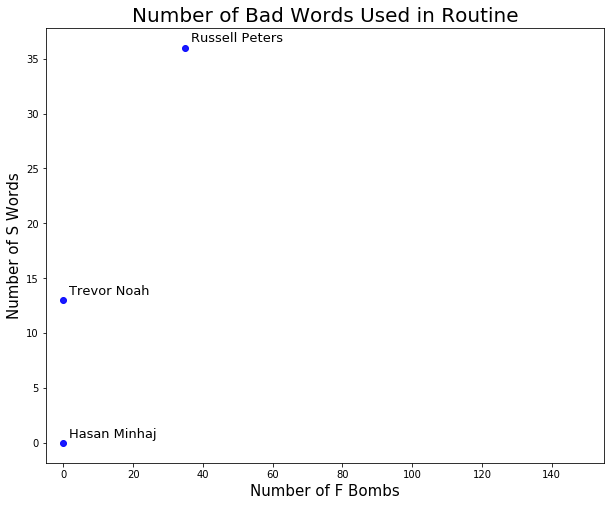

In [58]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue',cmap='jet',alpha=0.9)
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=13)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()